В файле должны быть сохранены результаты запуска на тестовых данных.

Дано: API для данных о футбольных матчах и командах.

Используя kmeans сделать кластеризацию футбольных команд по стоимости(X) и количеству проигрышей, результат отобразить в виде точечного графика для случая из 3 и из 5 кластеров.


In [9]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.vq import whiten, kmeans2
from pprint import pprint
%matplotlib inline

In [2]:
def call_api(uri, result_key):
    json = {}
    try:
        json = requests.get(uri, headers={'X-Auth-Token': '156809c82dae43b2b24c75429b9140ed'}).json()
        return json[result_key]
    except:
        print(json)
        return None

In [3]:
teams = call_api('http://api.football-data.org/v1/soccerseasons/439/teams', 'teams')
teams

[{'_links': {'fixtures': {'href': 'http://api.football-data.org/v1/teams/496/fixtures'},
   'players': {'href': 'http://api.football-data.org/v1/teams/496/players'},
   'self': {'href': 'http://api.football-data.org/v1/teams/496'}},
  'code': None,
  'crestUrl': 'http://upload.wikimedia.org/wikipedia/de/6/63/Rio_Ave_FC.svg',
  'name': 'FC Rio Ave',
  'shortName': 'Rio Ave',
  'squadMarketValue': None},
 {'_links': {'fixtures': {'href': 'http://api.football-data.org/v1/teams/503/fixtures'},
   'players': {'href': 'http://api.football-data.org/v1/teams/503/players'},
   'self': {'href': 'http://api.football-data.org/v1/teams/503'}},
  'code': 'FCP',
  'crestUrl': 'http://upload.wikimedia.org/wikipedia/de/e/ed/FC_Porto_1922-2005.svg',
  'name': 'FC Porto',
  'shortName': 'Porto',
  'squadMarketValue': None},
 {'_links': {'fixtures': {'href': 'http://api.football-data.org/v1/teams/583/fixtures'},
   'players': {'href': 'http://api.football-data.org/v1/teams/583/players'},
   'self': {'href

In [14]:
for team in teams:
    players = call_api(team['_links']['players']['href'], 'players')
    fixtures = call_api(team['_links']['fixtures']['href'], 'fixtures')
    goals = 0
    for f in fixtures:
        if team['name'] == f['homeTeamName']:
            goals += f['result']['goalsHomeTeam'] if f['result']['goalsHomeTeam'] else 0
        else:
            goals += f['result']['goalsAwayTeam'] if f['result']['goalsAwayTeam'] else 0
    print('Team "{}", {} players, {} goals'.format(team['name'], len(players), goals))
    team['players'] = players
    team['goals'] = goals
    
pprint(teams)

Team "FC Rio Ave", 27 players, 11 goals
Team "FC Porto", 25 players, 39 goals
Team "Moreirense FC", 28 players, 7 goals
Team "FC Paços de Ferreira", 26 players, 13 goals
Team "Sporting CP", 27 players, 29 goals
Team "Maritimo Funchal", 29 players, 13 goals
Team "CD Tondela", 27 players, 15 goals
Team "SL Benfica", 31 players, 24 goals
Team "Boavista Porto FC", 37 players, 12 goals
Team "FC Arouca", 22 players, 0 goals
Team "Vitoria Setubal", 27 players, 12 goals
Team "C.F. Os Belenenses", 26 players, 13 goals
Team "Vitoria Guimaraes", 25 players, 14 goals
Team "Sporting Braga", 31 players, 19 goals
Team "GD Estoril Praia", 28 players, 8 goals
Team "Feirense", 29 players, 10 goals
Team "Nacional Funchal", 18 players, 0 goals
Team "G.D. Chaves", 25 players, 14 goals
[{'_links': {'fixtures': {'href': 'http://api.football-data.org/v1/teams/496/fixtures'},
             'players': {'href': 'http://api.football-data.org/v1/teams/496/players'},
             'self': {'href': 'http://api.footbal

               'dateOfBirth': '1993-01-06',
               'jerseyNumber': 17,
               'marketValue': None,
               'name': 'Jesús Corona',
               'nationality': 'Mexico',
               'position': 'Right Wing'},
              {'contractUntil': '2020-06-30',
               'dateOfBirth': '1991-04-14',
               'jerseyNumber': 11,
               'marketValue': None,
               'name': 'Moussa Marega',
               'nationality': 'Mali',
               'position': 'Secondary Striker'},
              {'contractUntil': '2019-06-30',
               'dateOfBirth': '1991-08-20',
               'jerseyNumber': 7,
               'marketValue': None,
               'name': 'Hernâni',
               'nationality': 'Portugal',
               'position': 'Right Wing'},
              {'contractUntil': '2019-06-30',
               'dateOfBirth': '1988-02-29',
               'jerseyNumber': 40,
               'marketValue': None,
               'name': 'Fabiano',
   

              {'contractUntil': '2022-06-30',
               'dateOfBirth': '1994-07-07',
               'jerseyNumber': 21,
               'marketValue': None,
               'name': 'Mattheus',
               'nationality': 'Brazil',
               'position': 'Attacking Midfield'},
              {'contractUntil': '2021-06-30',
               'dateOfBirth': '1994-02-02',
               'jerseyNumber': 55,
               'marketValue': None,
               'name': 'Tobias Figueiredo',
               'nationality': 'Portugal',
               'position': 'Centre-Back'},
              {'contractUntil': '2022-06-30',
               'dateOfBirth': '1997-02-13',
               'jerseyNumber': 82,
               'marketValue': None,
               'name': 'Pedro Silva',
               'nationality': 'Portugal',
               'position': 'Keeper'},
              {'contractUntil': '2021-06-30',
               'dateOfBirth': '1989-10-05',
               'jerseyNumber': 6,
               'marke

              {'contractUntil': '2020-06-30',
               'dateOfBirth': '1995-02-17',
               'jerseyNumber': 22,
               'marketValue': None,
               'name': 'Stéphane Sparagna',
               'nationality': 'France',
               'position': 'Centre-Back'},
              {'contractUntil': '2018-06-30',
               'dateOfBirth': '1986-06-06',
               'jerseyNumber': 33,
               'marketValue': None,
               'name': 'Vagner',
               'nationality': 'Brazil',
               'position': 'Keeper'},
              {'contractUntil': '2018-06-30',
               'dateOfBirth': '1986-10-19',
               'jerseyNumber': 23,
               'marketValue': None,
               'name': 'Nuno Henrique',
               'nationality': 'Portugal',
               'position': 'Centre-Back'},
              {'contractUntil': '2018-06-30',
               'dateOfBirth': '1989-08-30',
               'jerseyNumber': 5,
               'marketValue': 

               'jerseyNumber': 28,
               'marketValue': None,
               'name': 'Willyan',
               'nationality': 'Brazil',
               'position': 'Left Wing'},
              {'contractUntil': '2019-06-30',
               'dateOfBirth': '1995-04-24',
               'jerseyNumber': 12,
               'marketValue': None,
               'name': 'Miguel Lázaro',
               'nationality': 'Portugal',
               'position': 'Keeper'},
              {'contractUntil': None,
               'dateOfBirth': '1998-03-24',
               'jerseyNumber': 44,
               'marketValue': None,
               'name': 'Bernardo Morgado',
               'nationality': 'Portugal',
               'position': 'Centre-Back'},
              {'contractUntil': None,
               'dateOfBirth': '1993-08-08',
               'jerseyNumber': 2,
               'marketValue': None,
               'name': 'Diogo Sousa',
               'nationality': 'Portugal',
               'posi

               'name': 'Bruno Gomes',
               'nationality': 'Brazil',
               'position': 'Centre-Forward'},
              {'contractUntil': '2018-06-30',
               'dateOfBirth': '1990-05-02',
               'jerseyNumber': 10,
               'marketValue': None,
               'name': 'Kléber',
               'nationality': 'Brazil',
               'position': 'Centre-Forward'},
              {'contractUntil': None,
               'dateOfBirth': '1996-03-23',
               'jerseyNumber': 3,
               'marketValue': None,
               'name': 'Lucão',
               'nationality': 'Brazil',
               'position': 'Centre-Back'},
              {'contractUntil': None,
               'dateOfBirth': '1986-09-02',
               'jerseyNumber': 32,
               'marketValue': None,
               'name': 'Rafik Halliche',
               'nationality': 'Algeria',
               'position': 'Centre-Back'},
              {'contractUntil': '2018-06-30',
     

In [6]:
team_for_pd = []
for team in teams:
    if team['players']:
        team_for_pd.append({'name': team['name'], 'players': len(team['players']), 'goals': team['goals']})
team_for_pd

[{'goals': 11, 'name': 'FC Rio Ave', 'players': 27},
 {'goals': 39, 'name': 'FC Porto', 'players': 25},
 {'goals': 7, 'name': 'Moreirense FC', 'players': 28},
 {'goals': 13, 'name': 'FC Paços de Ferreira', 'players': 26},
 {'goals': 29, 'name': 'Sporting CP', 'players': 27},
 {'goals': 13, 'name': 'Maritimo Funchal', 'players': 29},
 {'goals': 15, 'name': 'CD Tondela', 'players': 27},
 {'goals': 24, 'name': 'SL Benfica', 'players': 31},
 {'goals': 12, 'name': 'Boavista Porto FC', 'players': 37},
 {'goals': 0, 'name': 'FC Arouca', 'players': 22},
 {'goals': 12, 'name': 'Vitoria Setubal', 'players': 27},
 {'goals': 13, 'name': 'C.F. Os Belenenses', 'players': 26},
 {'goals': 14, 'name': 'Vitoria Guimaraes', 'players': 25},
 {'goals': 19, 'name': 'Sporting Braga', 'players': 31},
 {'goals': 8, 'name': 'GD Estoril Praia', 'players': 28},
 {'goals': 10, 'name': 'Feirense', 'players': 29},
 {'goals': 0, 'name': 'Nacional Funchal', 'players': 18},
 {'goals': 14, 'name': 'G.D. Chaves', 'player

In [15]:
teams_pd = pd.DataFrame(team_for_pd)
del teams_pd['name']
teams_pd

,goals,players
0,11,27
1,39,25
2,7,28
3,13,26
4,29,27
5,13,29
6,15,27
7,24,31
8,12,37
9,0,22


In [18]:
whitened = whiten(teams_pd.as_matrix())
whitened

array([[ 1.20945493,  7.08000604],
       [ 4.2880675 ,  6.55556115],
       [ 0.76965314,  7.34222849],
       [ 1.42935583,  6.8177836 ],
       [ 3.18856301,  7.08000604],
       [ 1.42935583,  7.60445094],
       [ 1.64925673,  7.08000604],
       [ 2.63881077,  8.12889583],
       [ 1.31940538,  9.7022305 ],
       [ 0.        ,  5.76889381],
       [ 1.31940538,  7.08000604],
       [ 1.42935583,  6.8177836 ],
       [ 1.53930628,  6.55556115],
       [ 2.08905852,  8.12889583],
       [ 0.87960359,  7.34222849],
       [ 1.09950449,  7.60445094],
       [ 0.        ,  4.72000403],
       [ 1.53930628,  6.55556115]])

In [22]:
centroids, cluster_map = kmeans2(whitened, 5)
centroids, cluster_map

(array([[ 1.31940538,  9.7022305 ],
        [ 1.29941439,  7.08000604],
        [ 0.        ,  5.24444892],
        [ 4.2880675 ,  6.55556115],
        [ 2.63881077,  7.7792659 ]]),
 array([1, 3, 1, 1, 4, 1, 1, 4, 0, 2, 1, 1, 1, 4, 1, 1, 2, 1]))

In [23]:
colors_map = {0: 'r', 1: 'g', 2: 'b', 3: 'y', 4: 'm'}
colors = [colors_map[c] for c in cluster_map]
colors

['g',
 'y',
 'g',
 'g',
 'm',
 'g',
 'g',
 'm',
 'r',
 'b',
 'g',
 'g',
 'g',
 'm',
 'g',
 'g',
 'b',
 'g']

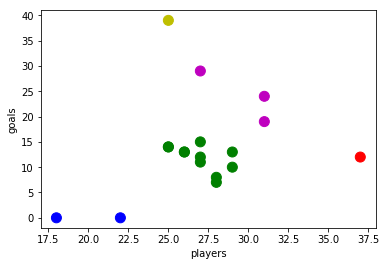

In [24]:
teams_pd.plot.scatter(x='players', y='goals', c=colors, s=100)